<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/seirs_basico_discreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parâmetros do modelo
beta = 0.5 # Taxa de transmissão
sigma = 1/7 # Incubação
gamma = 1/5 # Recuperação
omega = 1/365 # Imunidade
N = 10000 # População total
delta_t = 1.0 # Passo de tempo igual a 1 dia
T = 5*365 # Comprimento da simulação (dias)

# Inicialização das variáveis
passos = int(T / delta_t) + 1 # Inclui o ponto inicial
S = np.zeros(passos)
E = np.zeros(passos)
I = np.zeros(passos)
R = np.zeros(passos)
tempo = np.linspace(0, T, passos) # Vetor de tempo

# Condições iniciais
E[0] = 10. # Número inicial de expostos
I[0] = 0.0 # Número inicial de infectados
S[0] = N-E[0]-I[0] # Número inicial de suscetíveis
R[0] = 0.0 # Número inicial de recuperados

In [ ]:
# Iterações com equações de diferenças
for t in range(passos - 1):
  S[t+1]=S[t]+(-beta*S[t]*I[t]/N+omega*R[t])*delta_t
  E[t+1]=E[t]+(beta*S[t]*I[t]/N-sigma*E[t])*delta_t
  I[t+1] =I[t]+(sigma*E[t]-gamma*I[t])*delta_t
  R[t+1]=R[t]+(gamma*I[t]-omega*R[t])*delta_t

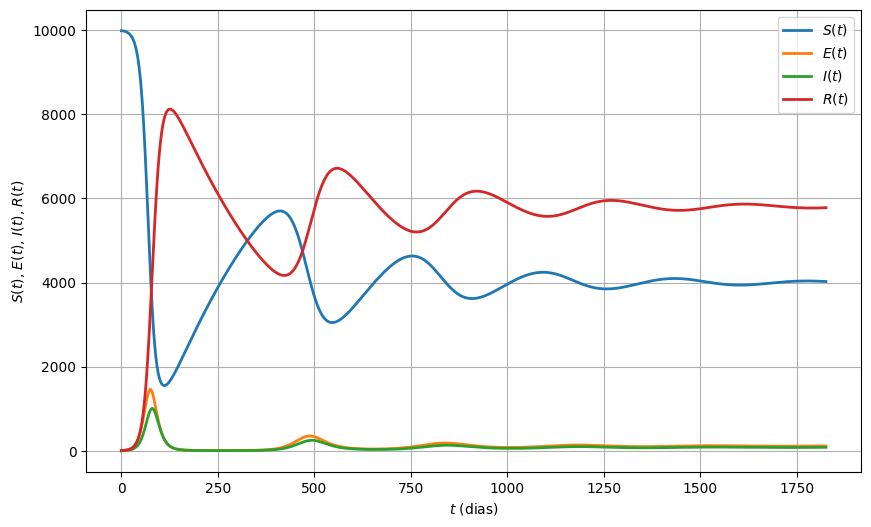

In [ ]:
# Gráfico
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(tempo, S, label="$S(t)$", lw=2)
plt.plot(tempo, E, label="$E(t)$", lw=2)
plt.plot(tempo, I, label="$I(t)$", lw=2)
plt.plot(tempo, R, label="$R(t)$", lw=2)
plt.xlabel("$t$ (dias)")
plt.ylabel("$S(t)$, $E(t)$, $I(t)$, $R(t)$")
plt.legend()
plt.grid()
plt.savefig("seirs5.png", dpi=300)  # Salvar em alta resolução
plt.show()

In [ ]:
# Gráfico para I(t) e E(t) somente
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(tempo, E, label="Expostos (E)", lw=1.5)
plt.plot(tempo, I, label="Infectados (I)", lw=1.5)
plt.title("Modelo SEIRS (Equações de Diferenças)")
plt.xlabel("$t$ (dias)")
plt.ylabel("$I(t), $E(t)$")
plt.legend()
plt.grid()
plt.savefig("seirs5.png", dpi=300)  # Salvar em alta resolução
plt.show()